# Librerias

In [ ]:
pip install yfinance

In [ ]:
pip install ta

In [ ]:
pip install mplfinance

In [ ]:
#API datos
import yfinance as yfin
# Manejo de datos
import pandas as pd
# Manejo de archivos
from google.colab import files
#Graficos
import matplotlib.pyplot as plt
# Funciones Matematicas
import numpy as np
# Velas Japnoes
import mplfinance as mpf
# Análisis tecnico
import ta
# Machine Learnging
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import roc_auc_score

# Datos

In [ ]:
df = yfin.download("^GSPC",start = "2010-01-01",end="2024-05-01")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,3656740000
2024-04-25,5019.879883,5057.750000,4990.580078,5048.419922,5048.419922,3958050000
2024-04-26,5084.649902,5114.620117,5073.140137,5099.959961,5099.959961,3604140000


# Análisis Técnico

In [ ]:
# Medias Moviles Exponenciales
df["EMA-5"] = ta.trend.ema_indicator(close =df["Close"],window = 5, fillna=True)/df["Adj Close"]
df["EMA-20"] = ta.trend.ema_indicator(close =df["Close"],window = 20, fillna=True)/df["Adj Close"]
df["EMA-50"] = ta.trend.ema_indicator(close =df["Close"],window = 50, fillna=True)/df["Adj Close"]
df["EMA-100"] = ta.trend.ema_indicator(close =df["Close"],window = 100, fillna=True)/df["Adj Close"]
# Indice de fuerza relativa
df["RSI"] =ta.momentum.rsi(close=df["Adj Close"], fillna = True)
# Rango verdadero medio
df["ATR"] = ta.volatility.average_true_range(high=df["High"],low = df["Low"], close = df["Adj Close"], fillna = True)
# rango de porcenaje de williams
df["WR"] = ta.momentum.williams_r(high=df["High"],low = df["Low"], close = df["Adj Close"], fillna = True)
df

,Open,High,Low,Close,Adj Close,Volume,EMA-5,EMA-20,EMA-50,EMA-100,RSI,ATR,WR
Date,,,,,,,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,1.000000,1.000000,1.000000,1.000000,100.000000,0.000000,-5.083813
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.997929,0.997190,0.997016,0.996956,100.000000,0.000000,-0.548010
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.998257,0.996966,0.996611,0.996483,100.000000,0.000000,-9.058495
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.996186,0.993660,0.992927,0.992660,100.000000,0.000000,-2.973060
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.995549,0.991680,0.990464,0.990010,100.000000,0.000000,-1.422250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,3656740000,0.995522,1.005512,1.001113,0.976069,45.804452,58.456845,-56.471954
2024-04-25,5019.879883,5057.750000,4990.580078,5048.419922,5048.419922,3958050000,1.000066,1.009169,1.005492,0.980941,43.372114,60.070628,-65.028622
2024-04-26,5084.649902,5114.620117,5073.140137,5099.959961,5099.959961,3604140000,0.993306,0.999069,0.995513,0.971601,49.753005,60.508454,-46.027686


# Movimiento del Precio

In [ ]:
cl = np.array(df["Adj Close"])
target = np.where(cl[1:] > cl[:-1],1,-1)
df.drop(df.tail(1).index, inplace = True)
df["Target"] = target
df

,Open,High,Low,Close,Adj Close,Volume,EMA-5,EMA-20,EMA-50,EMA-100,RSI,ATR,WR,Target
Date,,,,,,,,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,1.000000,1.000000,1.000000,1.000000,100.000000,0.000000,-5.083813,1
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.997929,0.997190,0.997016,0.996956,100.000000,0.000000,-0.548010,1
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.998257,0.996966,0.996611,0.996483,100.000000,0.000000,-9.058495,1
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.996186,0.993660,0.992927,0.992660,100.000000,0.000000,-2.973060,1
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.995549,0.991680,0.990464,0.990010,100.000000,0.000000,-1.422250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000,0.993494,1.006306,1.001372,0.975793,45.672800,59.687375,-61.393318,1
2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,3656740000,0.995522,1.005512,1.001113,0.976069,45.804452,58.456845,-56.471954,-1
2024-04-25,5019.879883,5057.750000,4990.580078,5048.419922,5048.419922,3958050000,1.000066,1.009169,1.005492,0.980941,43.372114,60.070628,-65.028622,1


# Modelo SVM

In [ ]:
df.drop(df.head(29).index,inplace = True)
df

,Open,High,Low,Close,Adj Close,Volume,EMA-5,EMA-20,EMA-50,EMA-100,RSI,ATR,WR,Target
Date,,,,,,,,,,,,,,
2010-02-16,1079.130005,1095.670044,1079.130005,1094.869995,1094.869995,4080770000,0.987118,0.995767,1.012605,1.022253,49.438075,17.279493,-16.370560,1
2010-02-17,1096.140015,1101.030029,1094.719971,1099.510010,1099.510010,4259230000,0.988635,0.992368,1.008005,1.017583,51.244123,16.495962,-8.666732,1
2010-02-18,1099.030029,1108.239990,1097.479980,1106.750000,1106.750000,3878620000,0.988112,0.987221,1.001356,1.010710,54.004837,16.086251,-2.337607,1
2010-02-19,1105.489990,1112.420044,1100.800049,1109.170044,1109.170044,3944280000,0.990637,0.986490,0.999204,1.008337,54.923620,15.767233,-4.785038,-1
2010-02-22,1110.000000,1112.290039,1105.380005,1108.010010,1108.010010,3814440000,0.994450,0.988711,1.000240,1.009206,54.363041,15.134576,-6.492979,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000,0.993494,1.006306,1.001372,0.975793,45.672800,59.687375,-61.393318,1
2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,3656740000,0.995522,1.005512,1.001113,0.976069,45.804452,58.456845,-56.471954,-1
2024-04-25,5019.879883,5057.750000,4990.580078,5048.419922,5048.419922,3958050000,1.000066,1.009169,1.005492,0.980941,43.372114,60.070628,-65.028622,1


In [ ]:
X = np.array(df.iloc[:,6:-1])
Y= np.array(df["Target"])
print(len(X),len(Y))

3575 3575


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,shuffle = False)

In [ ]:
len(X_test)

358

In [ ]:
ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
svc = SVC()
svc.fit(X_train,Y_train)

SVC()

In [ ]:
svc_pred = svc.predict(X_test)
accuracy_score(Y_test,svc_pred)

0.5167597765363129

In [ ]:
confusion_matrix(Y_test,svc_pred)

array([[  5, 165],
       [  8, 180]])

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test,svc_pred)

Text(0, 0.5, 'True Positive Rate')

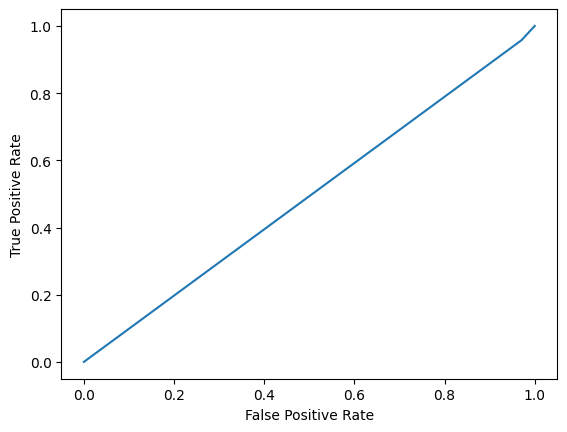

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
roc_auc_score(Y_test,svc_pred)

0.49342928660826035

# Backtesting

In [ ]:
N = len(Y_test)
df = df.tail(N)
df["Signals"] = svc_pred
df

<ipython-input-73-b1f03ab72555>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Signals"] = svc_pred


,Open,High,Low,Close,Adj Close,Volume,EMA-5,EMA-20,EMA-50,EMA-100,RSI,ATR,WR,Target,Signals
Date,,,,,,,,,,,,,,,
2022-11-23,4000.300049,4033.780029,3998.659912,4027.260010,4027.260010,3279720000,0.990358,0.969516,0.960152,0.971868,62.109623,69.227806,-2.006531,-1,1
2022-11-25,4023.340088,4034.020020,4020.760010,4026.120117,4026.120117,1706460000,0.993759,0.972667,0.961976,0.972695,61.991034,65.230107,-2.725984,-1,1
2022-11-28,4005.360107,4012.270020,3955.770020,3963.939941,3963.939941,3615430000,1.006232,0.989075,0.977966,0.988192,55.739053,65.595820,-24.182218,-1,1
2022-11-29,3964.189941,3976.770020,3937.649902,3957.629883,3957.629883,3546040000,1.005224,0.991542,0.980328,0.989970,55.131402,63.704699,-26.359601,1,1
2022-11-30,3957.179932,4080.110107,3938.580078,4080.110107,4080.110107,6579360000,0.983366,0.965418,0.952825,0.961039,63.458568,69.263651,-0.000000,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000,0.993494,1.006306,1.001372,0.975793,45.672800,59.687375,-61.393318,1,1
2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,3656740000,0.995522,1.005512,1.001113,0.976069,45.804452,58.456845,-56.471954,-1,1
2024-04-25,5019.879883,5057.750000,4990.580078,5048.419922,5048.419922,3958050000,1.000066,1.009169,1.005492,0.980941,43.372114,60.070628,-65.028622,1,1


In [ ]:
equity = [100]

df_equity = pd.DataFrame()

TP = 0.03
SL = 0.01

price_100 = df["Close"][258:358]
signal_100 = df["Signals"][258:358]

pos = 0
price = 0

for i in range(1,100):

  equity.append(equity[i-1])

  if pos == 1:
    if price_100[i] >= price*(1+TP):
      pos = 0
      equity[i] *= (1+TP)

    elif price_100[i] <= price*(1-SL):
      pos = 0
      equity[i] *=(1-SL)

  elif pos == -1:

    if price_100[i] <= price*(1-TP):
      pos = 0
      equity[i] *= (1+TP)

    elif price_100[i] >= price*(1+SL):
      pos = 0
      equity[i] *=(1-SL)

  else:

    if signal_100[i] !=0:
      pos = signal_100[i]
      price = price_100[i]

df_equity["Equity"] = equity

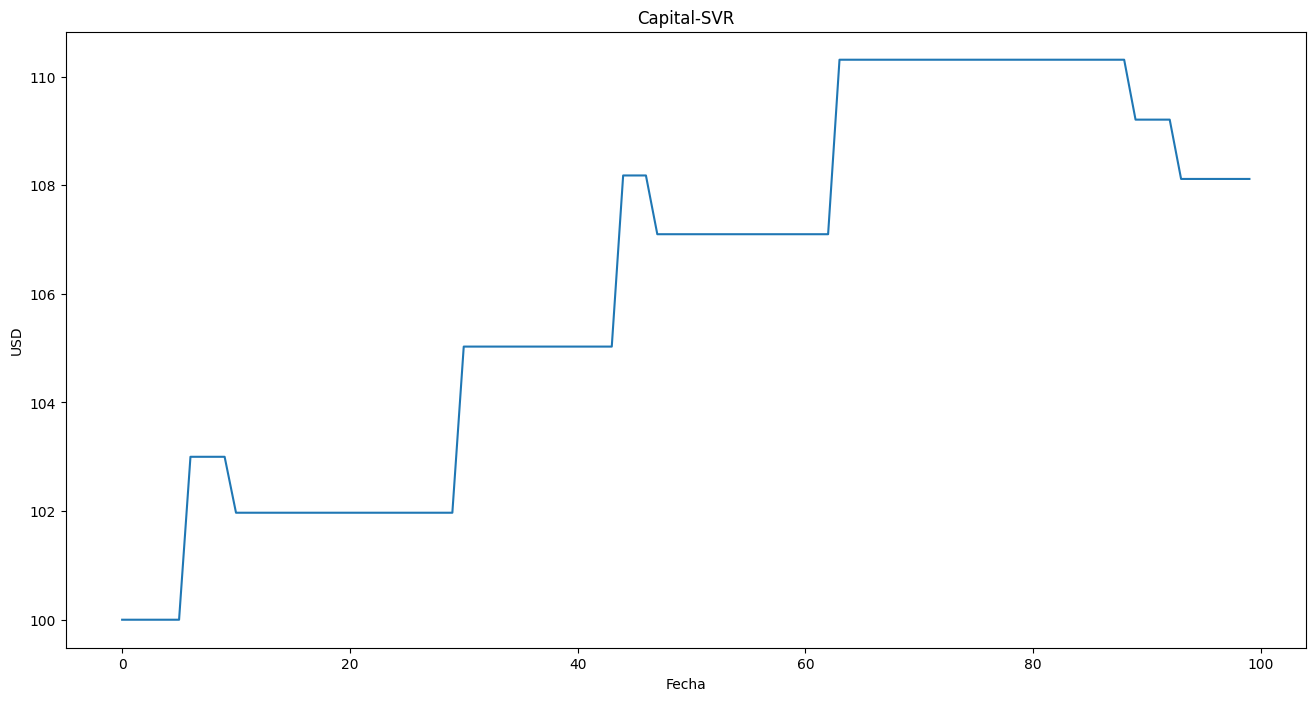

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df_equity["Equity"])
plt.title("Capital-SVR")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.show()

In [ ]:
ret =np.log(df_equity["Equity"]).diff().mean()
ret *= 252
vol =np.log(df_equity["Equity"]).diff().std()
vol *= np.sqrt(252)
vol

rf =  0.052
sharpe_ratio = (ret-rf)/vol
sharpe_ratio

1.4761171668921984

In [ ]:
df_equity

,Equity
0,100.000000
1,100.000000
2,100.000000
3,100.000000
4,100.000000
...,...
95,108.115927
96,108.115927
97,108.115927
98,108.115927


# Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,Y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)
accuracy_score(Y_test,rfc_pred)

0.547486033519553

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test,rfc_pred)

Text(0, 0.5, 'True Positive Rate')

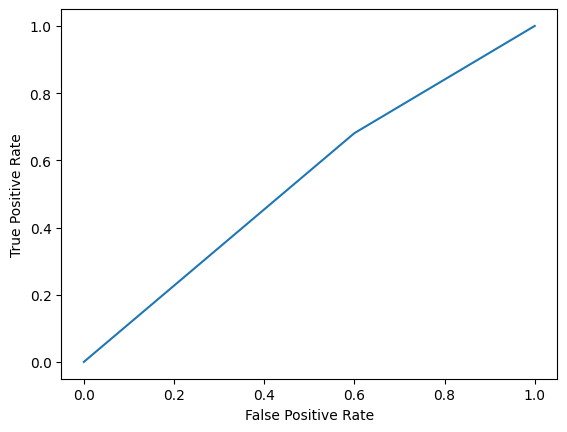

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
roc_auc_score(Y_test,rfc_pred)

0.5404255319148936

In [ ]:
confusion_matrix(Y_test,rfc_pred)

array([[ 68, 102],
       [ 60, 128]])

In [ ]:
N = len(Y_test)
df = df.tail(N)
df["Signals"] = rfc_pred
df

,Open,High,Low,Close,Adj Close,Volume,EMA-5,EMA-20,EMA-50,EMA-100,RSI,ATR,WR,Target,Signals
Date,,,,,,,,,,,,,,,
2022-11-23,4000.300049,4033.780029,3998.659912,4027.260010,4027.260010,3279720000,0.990358,0.969516,0.960152,0.971868,62.109623,69.227806,-2.006531,-1,-1
2022-11-25,4023.340088,4034.020020,4020.760010,4026.120117,4026.120117,1706460000,0.993759,0.972667,0.961976,0.972695,61.991034,65.230107,-2.725984,-1,-1
2022-11-28,4005.360107,4012.270020,3955.770020,3963.939941,3963.939941,3615430000,1.006232,0.989075,0.977966,0.988192,55.739053,65.595820,-24.182218,-1,1
2022-11-29,3964.189941,3976.770020,3937.649902,3957.629883,3957.629883,3546040000,1.005224,0.991542,0.980328,0.989970,55.131402,63.704699,-26.359601,1,1
2022-11-30,3957.179932,4080.110107,3938.580078,4080.110107,4080.110107,6579360000,0.983366,0.965418,0.952825,0.961039,63.458568,69.263651,-0.000000,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000,0.993494,1.006306,1.001372,0.975793,45.672800,59.687375,-61.393318,1,1
2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,3656740000,0.995522,1.005512,1.001113,0.976069,45.804452,58.456845,-56.471954,-1,1
2024-04-25,5019.879883,5057.750000,4990.580078,5048.419922,5048.419922,3958050000,1.000066,1.009169,1.005492,0.980941,43.372114,60.070628,-65.028622,1,1


In [ ]:
equity = [100]

df_equity = pd.DataFrame()

TP = 0.03
SL = 0.01

price_100 = df["Close"][258:358]
signal_100 = df["Signals"][258:358]

pos = 0
price = 0

for i in range(1,100):

  equity.append(equity[i-1])

  if pos == 1:
    if price_100[i] >= price*(1+TP):
      pos = 0
      equity[i] *= (1+TP)

    elif price_100[i] <= price*(1-SL):
      pos = 0
      equity[i] *=(1-SL)

  elif pos == -1:

    if price_100[i] <= price*(1-TP):
      pos = 0
      equity[i] *= (1+TP)

    elif price_100[i] >= price*(1+SL):
      pos = 0
      equity[i] *=(1-SL)

  else:

    if signal_100[i] !=0:
      pos = signal_100[i]
      price = price_100[i]

df_equity["Equity"] = equity

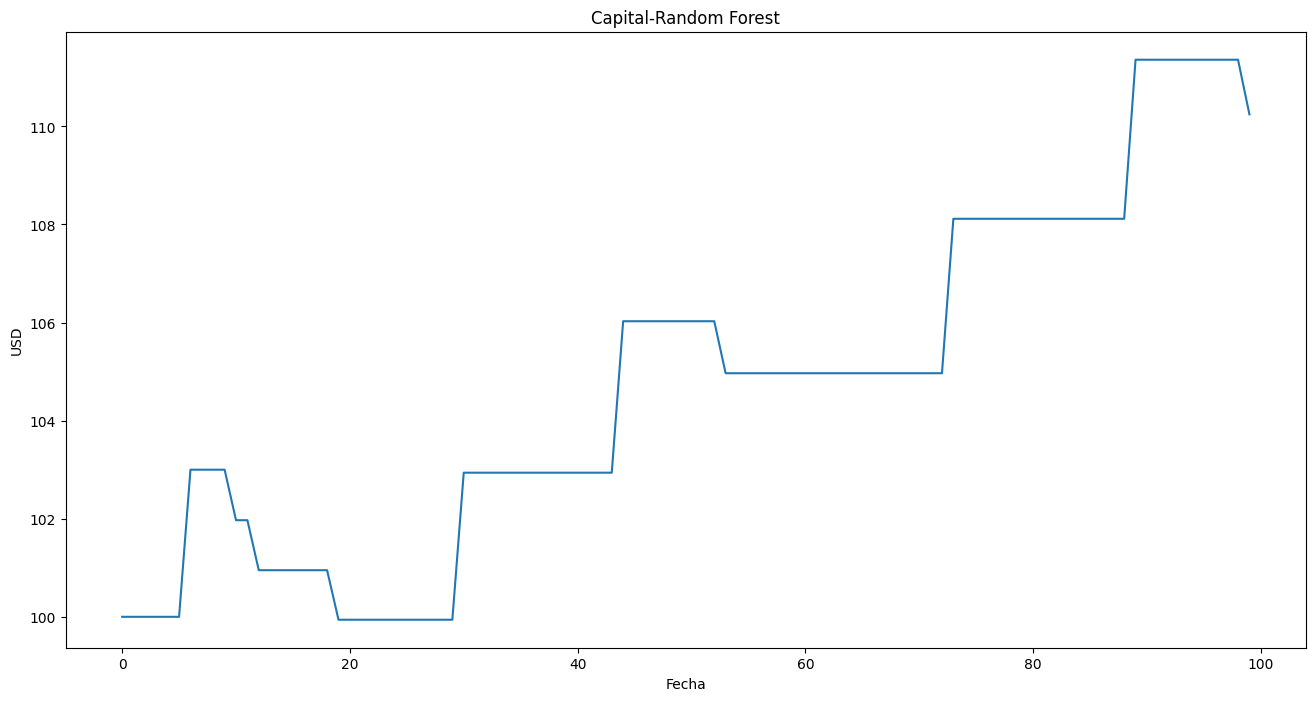

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df_equity["Equity"])
plt.title("Capital-Random Forest")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.show()

In [ ]:
ret =np.log(df_equity["Equity"]).diff().mean()
ret *= 252
vol =np.log(df_equity["Equity"]).diff().std()
vol *= np.sqrt(252)
vol

rf =  0.01
sharpe_ratio = (ret-rf)/vol
sharpe_ratio

2.1498838599599726

In [ ]:
df_equity

,Equity
0,100.000000
1,100.000000
2,100.000000
3,100.000000
4,100.000000
...,...
95,111.359405
96,111.359405
97,111.359405
98,111.359405
